In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

##### 1. Titanic

In [4]:
titanic = sns.load_dataset("titanic")  
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


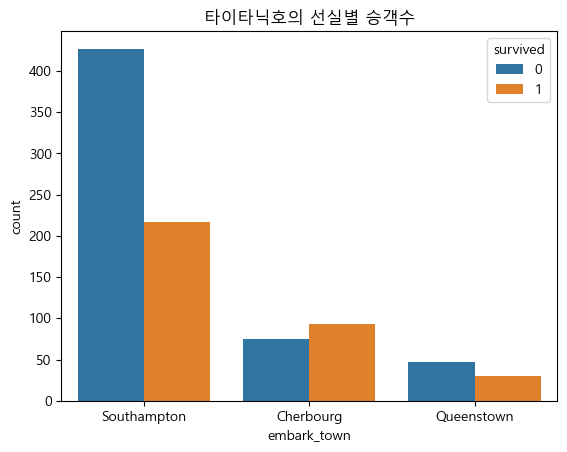

In [7]:
sns.countplot(x='embark_town', hue='survived', data=titanic)
plt.title('타이타닉호의 embark_town별 생존율')
plt.show()

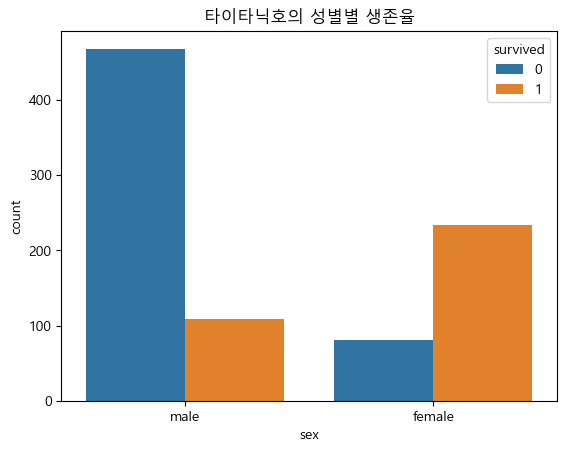

In [8]:
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title('타이타닉호의 성별별 생존율')
plt.show()

In [10]:
dt = titanic.pivot_table('survived','embark_town','sex','count')
dt

sex,female,male
embark_town,,
Cherbourg,73,95
Queenstown,36,41
Southampton,203,441


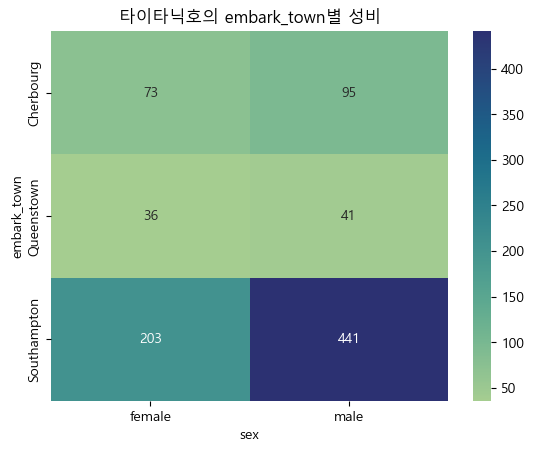

In [12]:
sns.heatmap(dt, cmap='crest', annot=True, fmt="d")
plt.title('타이타닉호의 embark_town과 성별에 따른 생존자수');

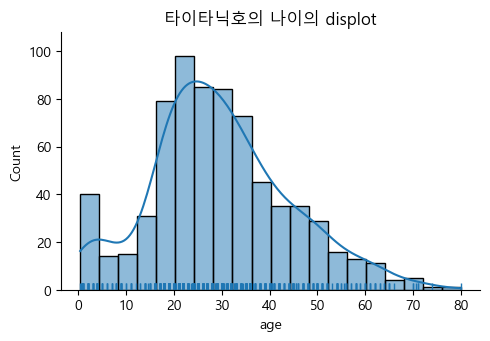

In [9]:
fig = sns.displot(x='age', data = titanic, kde=True, rug=True)
fig.fig.set_size_inches(5,3)
plt.title('타이타닉호의 나이의 displot')
plt.show()

##### 2. CCTV

In [2]:
filename = 'data/서울시 자치구 년도별 CCTV 설치 현황_221231기준.csv'
cctv = pd.read_csv(filename, encoding='euc-kr')
cctv.head()

,구분,총계,2013년 이전 설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,...,Unnamed: 16374,Unnamed: 16375,Unnamed: 16376,Unnamed: 16377,Unnamed: 16378,Unnamed: 16379,Unnamed: 16380,Unnamed: 16381,Unnamed: 16382,Unnamed: 16383
0,계,"91,341","2,804","3,097","3,981","6,576","8,850","11,566","11,024","13,151",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,종로구,"1,980",36,540,107,161,131,158,152,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,중 구,"2,584",130,87,77,236,240,372,386,155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,용산구,"2,847",44,50,68,83,295,491,115,322,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,성동구,"4,047",58,99,110,366,279,945,459,647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 자치구 법정순
cctv1 = cctv.pivot(index='month',columns='year',values='총계')
sns.heatmap(cctv1, annot=True,fmt='d',linewidths=1)
plt.title('자치구 법정순');